In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import io

In [2]:
df1 = pd.DataFrame(pd.read_excel('F:\CI\Class\Data13.xlsx',nrows=4000))
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 4000 rows and 8 columns


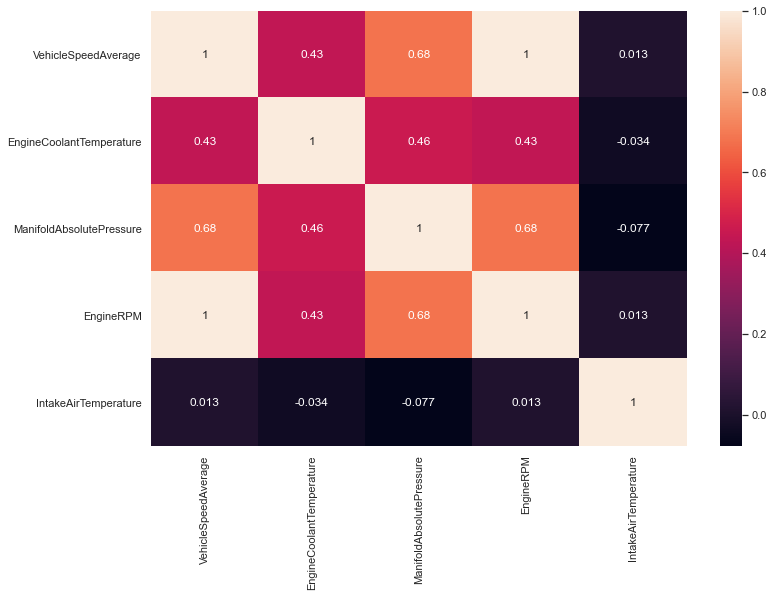

In [3]:
sns.set(rc={'figure.figsize': (12,8)})

corr = np.corrcoef(df1.corr())
sns.heatmap(df1.corr(), annot=True)
plt.show()

In [4]:
df1['Style'] = df1['drivingStyle'].astype('category').cat.codes
df1['Congestion'] = df1['traffic'].astype('category').cat.codes
df1.head()

VehicleSpeedAverage  EngineCoolantTemperature  ManifoldAbsolutePressure  \
0            13.637810                        37                       100   
1            13.637810                        37                       100   
2            13.605983                        37                       100   
3            13.653724                        37                       100   
4            13.653724                        37                       100   

   EngineRPM  IntakeAirTemperature      roadSurface                  traffic  \
0        857                    21  SmoothCondition  HighCongestionCondition   
1        857                    21  SmoothCondition  HighCongestionCondition   
2        855                    21  SmoothCondition  HighCongestionCondition   
3        858                    20  SmoothCondition  HighCongestionCondition   
4        858                    21  SmoothCondition  HighCongestionCondition   

    drivingStyle  Style  Congestion  
0  EvenPaceStyle      1           0  
1  EvenPaceStyle      1           0  
2  EvenPaceStyle      1           0  
3  EvenPaceStyle      1           0  
4  EvenPaceStyle      1           0

In [5]:
df = df1.drop('drivingStyle',axis=1).drop('roadSurface',axis=1).drop('traffic',axis=1)
#df = df1.drop('drivingStyle',axis=1).drop('roadSurface',axis=1).drop('traffic',axis=1).drop('VehicleInstantSpeed',axis=1)
df.head()

VehicleSpeedAverage  EngineCoolantTemperature  ManifoldAbsolutePressure  \
0            13.637810                        37                       100   
1            13.637810                        37                       100   
2            13.605983                        37                       100   
3            13.653724                        37                       100   
4            13.653724                        37                       100   

   EngineRPM  IntakeAirTemperature  Style  Congestion  
0        857                    21      1           0  
1        857                    21      1           0  
2        855                    21      1           0  
3        858                    20      1           0  
4        858                    21      1           0

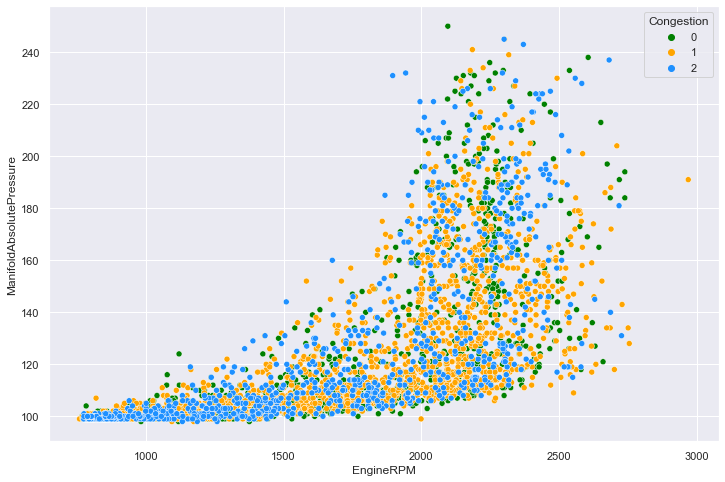

In [6]:
# Plotting the highest correlated pairs
sns.set_palette("bright")
sns.scatterplot(data=df1, x='EngineRPM', y='ManifoldAbsolutePressure', hue='Congestion', palette=['green','orange','dodgerblue'])
plt.show()

In [7]:
X= df.drop('Style',axis=1).drop('Congestion',axis=1)
y=df['Congestion']
print(X)
print(y)



      VehicleSpeedAverage  EngineCoolantTemperature  ManifoldAbsolutePressure  \
0               13.637810                        37                       100   
1               13.637810                        37                       100   
2               13.605983                        37                       100   
3               13.653724                        37                       100   
4               13.653724                        37                       100   
...                   ...                       ...                       ...   
3995            30.585614                        82                       112   
3996            28.803310                        82                       111   
3997            27.291534                        82                       110   
3998            24.649905                        82                       109   
3999            21.180777                        82                       107   

      EngineRPM  IntakeAirT

In [8]:
from sklearn.preprocessing import StandardScaler
Xs = StandardScaler().fit_transform(X)

print(Xs[0:5])
print("Shape of Feature Matrix is: ")
Xs.shape

[[-1.31173343 -2.344224   -0.72241289 -1.31173343  0.66420671]
 [-1.31173343 -2.344224   -0.72241289 -1.31173343  0.66420671]
 [-1.31524005 -2.344224   -0.72241289 -1.31524005  0.66420671]
 [-1.30998011 -2.344224   -0.72241289 -1.30998011  0.3857717 ]
 [-1.30998011 -2.344224   -0.72241289 -1.30998011  0.66420671]]
Shape of Feature Matrix is: 


(4000, 5)

In [9]:
X_covariance_matrix = np.cov(Xs.T)
X_covariance_matrix

array([[ 1.00025006,  0.43427371,  0.68425965,  1.00025006,  0.01300957],
       [ 0.43427371,  1.00025006,  0.45884723,  0.43427371, -0.03443491],
       [ 0.68425965,  0.45884723,  1.00025006,  0.68425965, -0.07722971],
       [ 1.00025006,  0.43427371,  0.68425965,  1.00025006,  0.01300957],
       [ 0.01300957, -0.03443491, -0.07722971,  0.01300957,  1.00025006]])

In [10]:
eig_vals, eig_vecs = np.linalg.eig(X_covariance_matrix)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-5.55818958e-01 -7.07106781e-01  3.16015816e-01  2.90344144e-01
   8.30636404e-02]
 [-3.73737665e-01 -3.35631517e-16  1.94413448e-01 -9.03031301e-01
  -8.40121348e-02]
 [-4.92018926e-01  4.21435616e-16 -8.66019975e-01  2.51327684e-02
  -8.54114921e-02]
 [-5.55818958e-01  7.07106781e-01  3.16015816e-01  2.90344144e-01
   8.30636404e-02]
 [ 1.91861169e-02  1.10229017e-17 -1.11717598e-01 -1.23706790e-01
   9.85823362e-01]]

Eigenvalues 
[ 2.89777706e+00 -1.48218548e-16  3.87899602e-01  7.03505544e-01
  1.01206810e+00]


In [11]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)
eig_pairs

[(2.897777064765098,
  array([-0.55581896, -0.37373767, -0.49201893, -0.55581896,  0.01918612])),
 (1.012068102334159,
  array([ 0.08306364, -0.08401213, -0.08541149,  0.08306364,  0.98582336])),
 (0.7035055438904472,
  array([ 0.29034414, -0.9030313 ,  0.02513277,  0.29034414, -0.12370679])),
 (0.3878996015884386,
  array([ 0.31601582,  0.19441345, -0.86601998,  0.31601582, -0.1117176 ])),
 (1.4821854831185515e-16,
  array([-7.07106781e-01, -3.35631517e-16,  4.21435616e-16,  7.07106781e-01,
          1.10229017e-17]))]

In [12]:
#matrix_w = np.hstack((eig_pairs[0][1].reshape(5,1), eig_pairs[1][1].reshape(5,1)))
matrix_w = np.hstack((eig_pairs[0][1].reshape(5,1), eig_pairs[1][1].reshape(5,1), eig_pairs[2][1].reshape(5,1)))

print ('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.55581896  0.08306364  0.29034414]
 [-0.37373767 -0.08401213 -0.9030313 ]
 [-0.49201893 -0.08541149  0.02513277]
 [-0.55581896  0.08306364  0.29034414]
 [ 0.01918612  0.98582336 -0.12370679]]


In [13]:
Y = Xs.dot(matrix_w)
print(Y)

[[ 2.70248177  0.69552141  1.25487629]
 [ 2.70248177  0.69552141  1.25487629]
 [ 2.70637987  0.69493886  1.25284003]
 ...
 [-0.27806746  1.47962657 -0.76909858]
 [ 0.06191296  1.43412876 -0.93894763]
 [ 0.51968207  1.37633829 -1.16257906]]


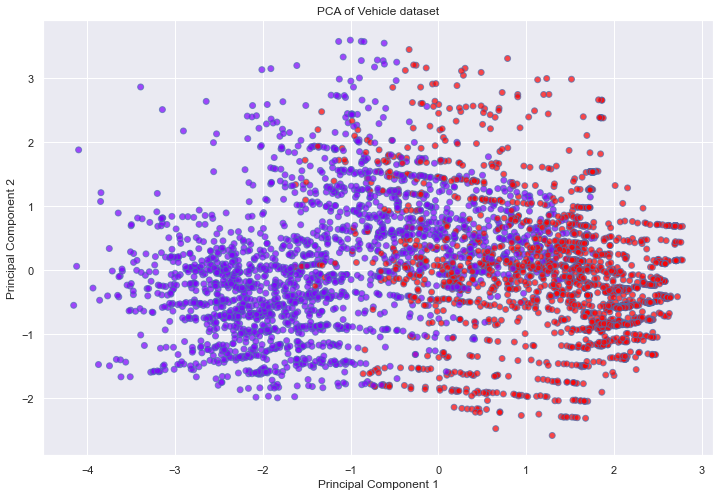

In [14]:
from sklearn.preprocessing import LabelEncoder

plt.figure()
le = LabelEncoder()
y = le.fit_transform(df['Style'])
plt.scatter(Y[:,0], Y[:,1],c=y, cmap='rainbow',alpha=0.7,edgecolors='b')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Vehicle dataset')
plt.show()

In [15]:
# packages to import
import numpy as np
import pylab as pl
from sklearn import svm
from sklearn.metrics import roc_curve, auc
C=1.0
Y1 = pd.DataFrame(Y)
# Run classifier
classifier11 = svm.SVC(kernel='sigmoid', C=C)
classifier11.fit(Y1,y)

SVC(kernel='sigmoid')

ValueError: Filler values must be provided when X has more than 2 training features.

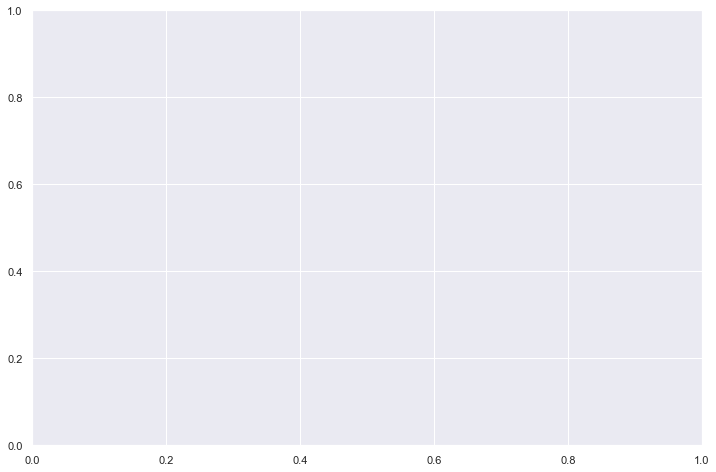

In [16]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(Y, y, clf=classifier11, legend=2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM of Vehicle dataset')
plt.show()


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(Y1, y, test_size=0.5, random_state=2)

# Run classifier
classifier1 = svm.SVC(kernel='sigmoid', probability=True)
probas_1 = classifier1.fit(trainX, trainy).predict_proba(testX)
y_predict1 = classifier1.predict(testX)


In [18]:
from sklearn.metrics import classification_report, confusion_matrix

cm = np.array(confusion_matrix(testy, y_predict1))
confusion = pd.DataFrame(cm)
print(confusion)

     0    1
0  879  161
1  183  777


In [19]:
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

Accuracy :  0.828


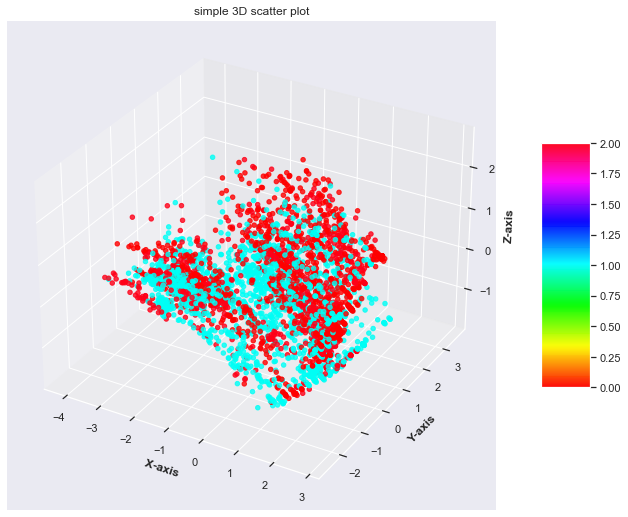

In [20]:
from mpl_toolkits import mplot3d
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
y = le.fit_transform(df['Congestion'])

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(Y[:,0], Y[:,1],Y[:,2], alpha = 0.8, c = y, cmap = my_cmap)
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

In [21]:
import plotly.express as px
df = X
fig = px.scatter_3d(df, x=Y[:,0], y=Y[:,1], z=Y[:,2], color = y)
fig.show()